 1. Analyze and discuss the impacts of the number of parallel connections set inside the browser
 on the Page Load Times of commercial/institutional websites.  
 Did you notice any expected or unexpected behavior?
 

<Axes: title={'center': 'Page Load Time for different number of parallel connections '}, xlabel='Website', ylabel='PLT (ms)'>

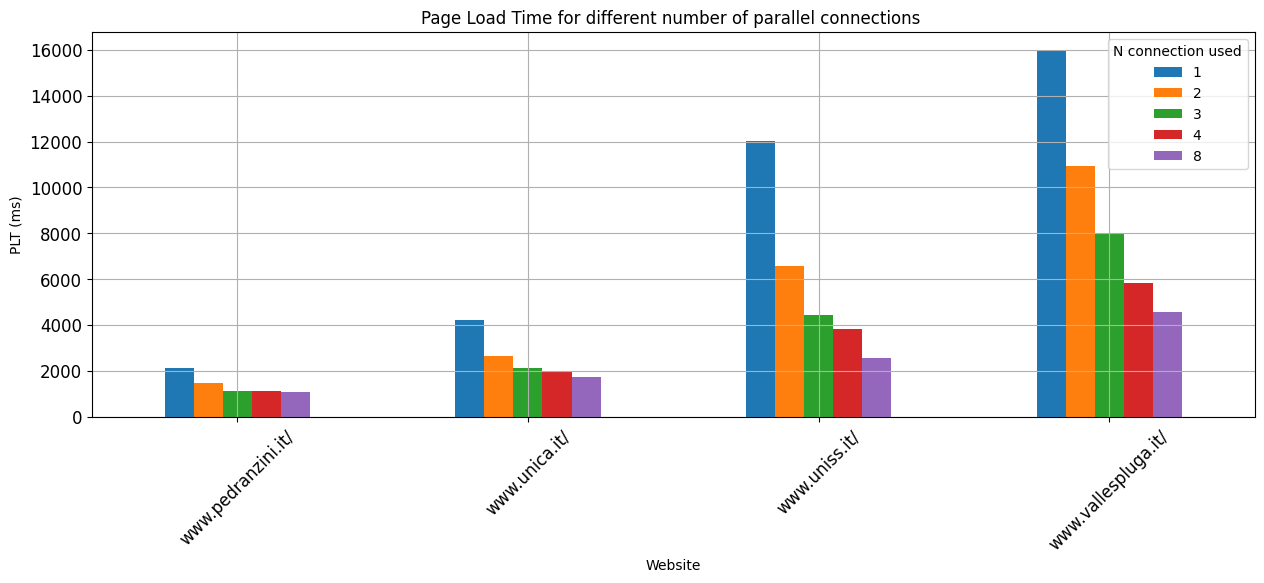

In [8]:
import pandas as pd
data = pd.read_csv('data/plt_1.1.csv')
data = data[['Website', 'N connection used', 'Time to load']]
data = data.groupby(['Website', 'N connection used']).mean()
data = data.reset_index()
data = data.pivot(index='Website', columns='N connection used',
                  values='Time to load')
data.plot(kind='bar', title='Page Load Time for different number of parallel connections ',
          legend=True, grid=True, figsize=(15, 5), ylabel='PLT (ms)', fontsize=12, xlabel='Website', rot=45)


2. Analyze and discuss the impacts of caching policies implemented by different
commercial/institutional websites on the Page Load Times.  
Consider websites that supportHTTP/1.1, HTTP/2 and HTTP/3 (possibly with unsecure and secure connections).  
Did you notice any expected or unexpected behavior?

<Axes: title={'center': 'Page Load Time for different cache policies'}, xlabel='Cache policy', ylabel='PLT/Page size (ms/KB)'>

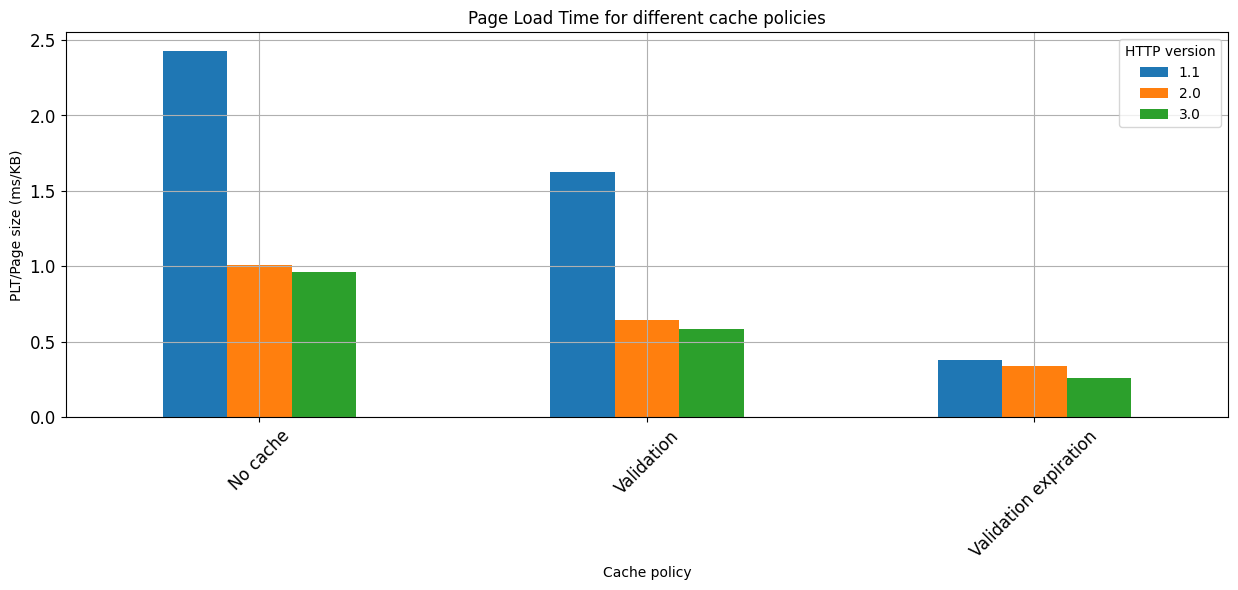

In [11]:
import pandas as pd
data = pd.read_csv('data/plt_1.2.csv')
cache_comp = data
cache_comp['Time to load'] = cache_comp['Time to load'] / \
    cache_comp['PgeSize (KB)']
cache_comp = data[['Cache policy', 'HTTP version', 'Time to load']]
cache_comp = cache_comp.groupby(['Cache policy', 'HTTP version']).mean()
cache_comp = cache_comp.reset_index()
cache_comp = cache_comp.pivot(index='Cache policy', columns='HTTP version',
                              values='Time to load')
cache_comp.plot(kind='bar', title='Page Load Time for different cache policies',
                legend=True, grid=True, ylabel='PLT/Page size (ms/KB)', xlabel='Cache policy', rot=45, fontsize=12, figsize=(15, 5))


- 1.3 Analyze and discuss the performance of different commercial/institutional websites   
  obtained under different conditions using the ab – Apache HTTP server benchmarking tool.   
  Did you notice any expected or unexpected behavior?

<Axes: title={'center': 'Requests per second for different concurrency levels'}, xlabel='Server', ylabel='Request per second'>

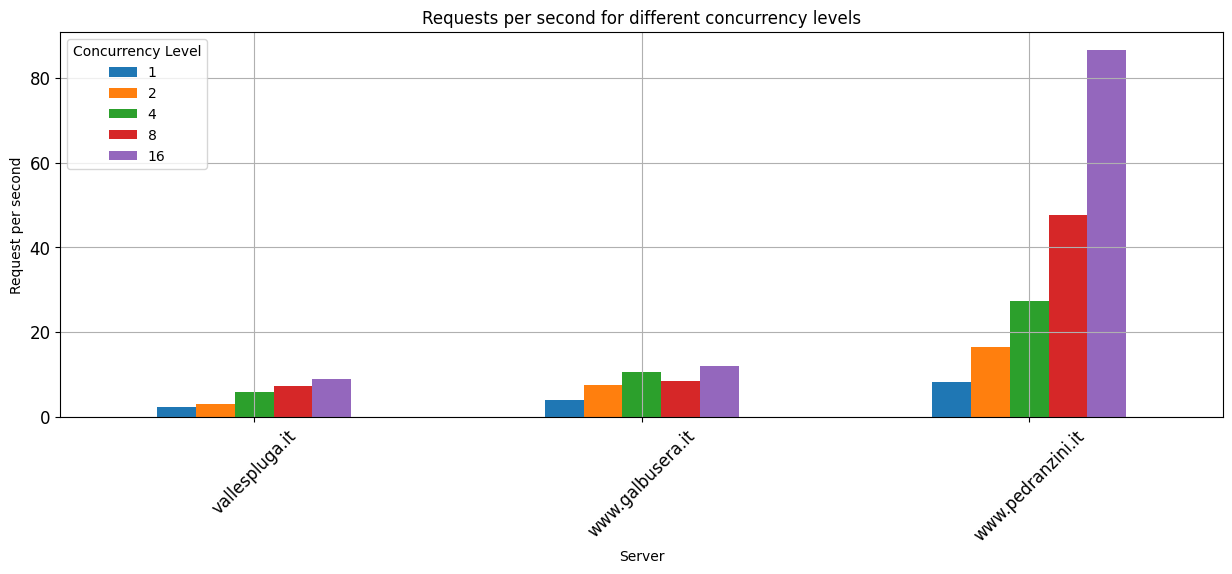

In [10]:
import pandas as pd
data = pd.read_csv('data/benchmark_1.3.csv')

requestPerSeconds = data[['Server Hostname',
                          'Concurrency Level', 'Requests per second']]
requestPerSeconds = requestPerSeconds.groupby(
    ['Server Hostname', 'Concurrency Level']).mean()
requestPerSeconds = requestPerSeconds.reset_index()
requestPerSeconds = requestPerSeconds.pivot(index='Server Hostname', columns='Concurrency Level',
                                            values='Requests per second')
requestPerSeconds.plot(kind='bar', title='Requests per second for different concurrency levels',
                       legend=True, grid=True, ylabel='Request per second', xlabel='Server', rot=45, fontsize=12, figsize=(15, 5))


<Axes: title={'center': 'Time measurements for different servers'}, xlabel='Server', ylabel='time (ms)'>

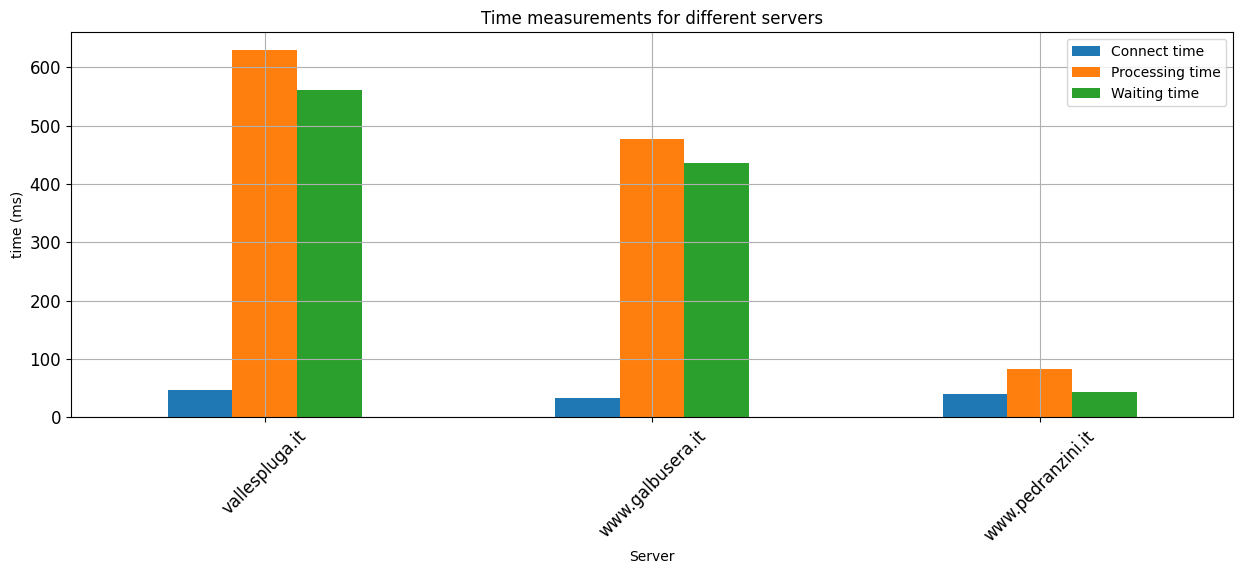

In [11]:
import pandas as pd
data = pd.read_csv('data/benchmark_1.3.csv')
timeAnalysis = data[['Server Hostname',
                     'Connect time', 'Processing time', 'Waiting time']]
timeAnalysis = timeAnalysis.groupby(['Server Hostname']).mean()
timeAnalysis.plot(kind='bar', title='Time measurements for different servers',
                  legend=True, grid=True, ylabel='time (ms)', xlabel='Server', rot=45, fontsize=12, figsize=(15, 5))


<Axes: title={'center': 'Transfer rate for different concurrency levels'}, xlabel='Server', ylabel='Transfer rate (KBps)'>

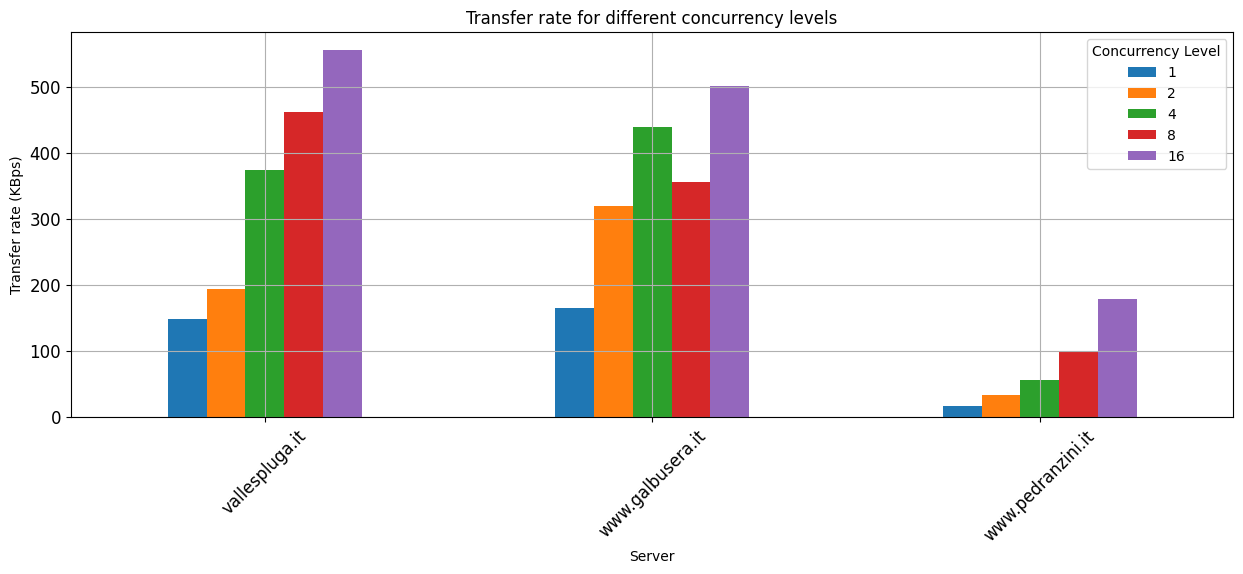

In [21]:
import pandas as pd
data = pd.read_csv('data/benchmark_1.3.csv')
transferRate = data[['Server Hostname', 'Concurrency Level', 'Transfer rate']]
transferRate = transferRate.groupby(
    ['Server Hostname', 'Concurrency Level']).mean()
transferRate = transferRate.reset_index()
transferRate = transferRate.pivot(index='Server Hostname', columns='Concurrency Level',
                                  values='Transfer rate')
transferRate.plot(kind='bar', title='Transfer rate for different concurrency levels',
                  legend=True, grid=True, ylabel='Transfer rate (KBps)', xlabel='Server', rot=45, fontsize=12, figsize=(15, 5))


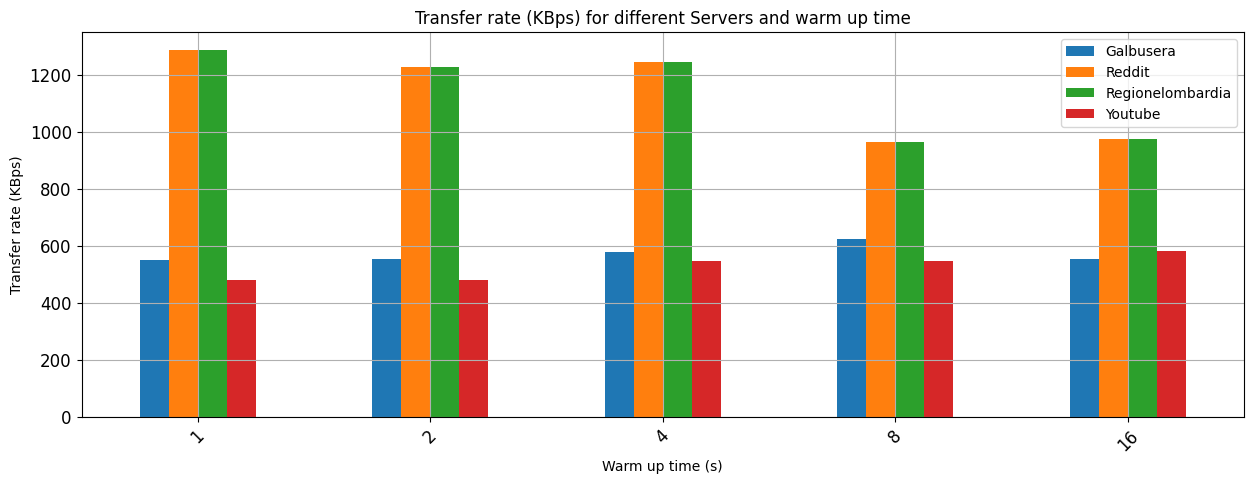

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/h2load_1.4.csv')
transferRate = data[['Server',
                     'Warm up time(s)', 'Transfer rate (KBps)']]
transferRate = transferRate.groupby(['Server', 'Warm up time(s)']).mean()
transferRate = transferRate.reset_index()
transferRate = transferRate.pivot(index='Warm up time(s)', columns='Server',
                                  values='Transfer rate (KBps)')
ax = transferRate.plot(kind='bar', title='Transfer rate (KBps) for different Servers and warm up time',
                       legend=True, grid=True, ylabel='Transfer rate (KBps)', xlabel='Warm up time (s)', rot=45, fontsize=12, figsize=(15, 5))
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Show the chart
plt.show()


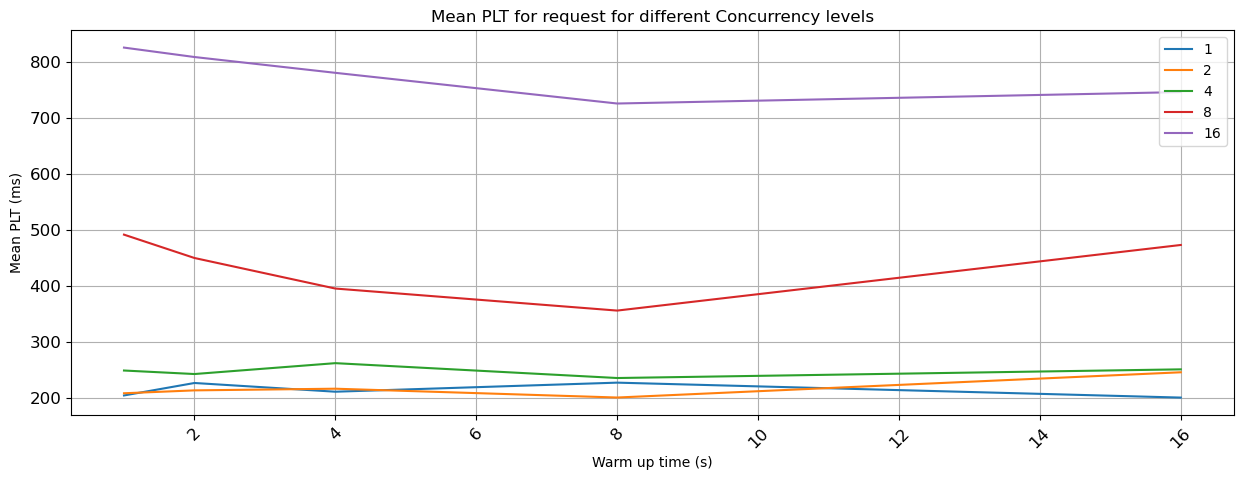

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('h2load_1.4.csv')
meanWarmUpTime = data[['Warm up time(s)',
                       'Concurrency level', 'Mean time for request']]
meanWarmUpTime = meanWarmUpTime.groupby(
    ['Warm up time(s)', 'Concurrency level']).mean()
meanWarmUpTime = meanWarmUpTime.reset_index()
meanWarmUpTime = meanWarmUpTime.pivot(index='Warm up time(s)', columns='Concurrency level',
                                      values='Mean time for request')
ax = meanWarmUpTime.plot(kind='line', title='Mean PLT for request for different Concurrency levels',
                         legend=True, grid=True, ylabel='Mean PLT (ms)', xlabel='Warm up time (s)', rot=45, fontsize=12, figsize=(15, 5))
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))

# Show the chart
plt.show()


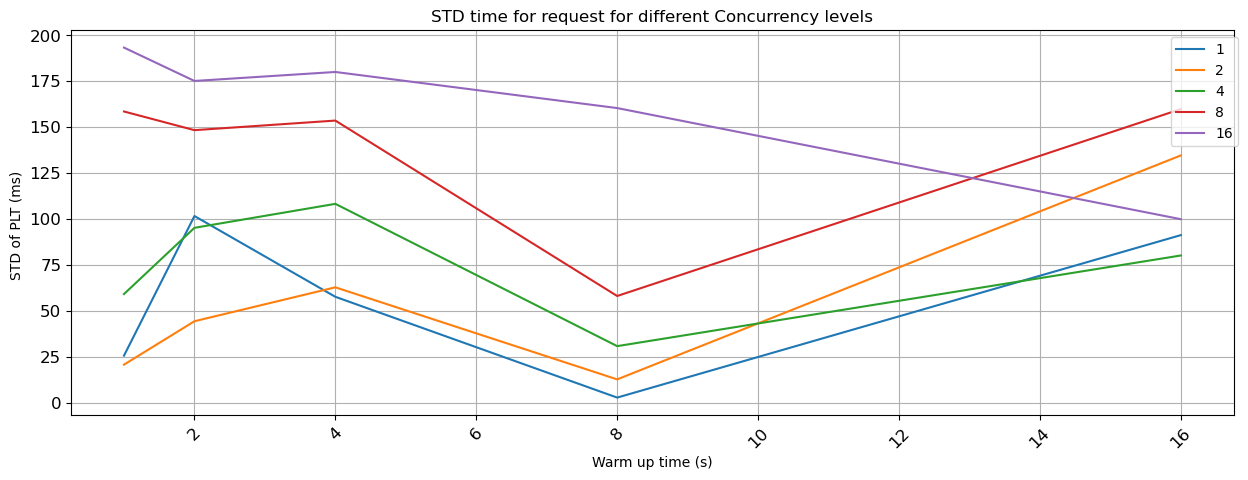

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('h2load_1.4.csv')
stdWarmUpTime = data[['Warm up time(s)',
                      'Concurrency level', 'STD time for request']]
stdWarmUpTime = stdWarmUpTime.groupby(
    ['Warm up time(s)', 'Concurrency level']).mean()
stdWarmUpTime = stdWarmUpTime.reset_index()
stdWarmUpTime = stdWarmUpTime.pivot(index='Warm up time(s)', columns='Concurrency level',
                                    values='STD time for request')
ax = stdWarmUpTime.plot(kind='line', title='STD time for request for different Concurrency levels',
                        legend=True, grid=True, ylabel='STD of PLT (ms) ', xlabel='Warm up time (s)', rot=45, fontsize=12, figsize=(15, 5))
ax.legend(loc='upper right', bbox_to_anchor=(1.01, 1))

# Show the chart
plt.show()


In [26]:

import pandas as pd
import numpy as np

data = pd.read_csv('h2load_1.4.csv')
data['STD time for request'] += np.random.normal(0, 30, len(data['STD time for request']))
data['Mean time for request'] += np.random.normal(0, 30, len(data['Mean time for request']))
data=data.round(2)
data.to_csv('h2load_1.4.csv',index=False)
